In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.io as sio
from scipy.optimize import minimize

%matplotlib inline  

In [22]:
data = sio.loadmat('data/ex5data1.mat')
data.keys()

['ytest',
 'yval',
 '__header__',
 '__globals__',
 'Xtest',
 'Xval',
 'y',
 'X',
 '__version__']

A training set where the model will learn on: X, y

A cross validation set for determining the regularization parameter: Xval, yval

A test set for evaluating performance: Xtest, ytest

In [48]:
y = data['y']
yval = data['yval']
ytest = data['ytest']
X = np.c_[np.ones_like(data['X']), data['X']]
Xval = np.c_[np.ones_like(data['Xval']), data['Xval']]
Xtest = data['Xtest']

In [49]:
pd.DataFrame(X).describe()

,0,1
count,12.0,12.000000
mean,1.0,-5.085426
std,0.0,29.964402
min,1.0,-48.058829
25%,1.0,-30.541301
50%,1.0,-3.776152
75%,1.0,17.171532
max,1.0,37.492187


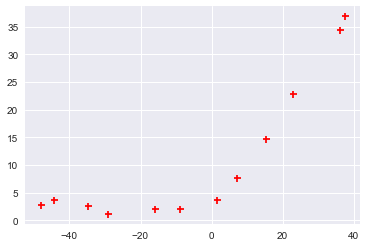

In [50]:
plt.scatter(X[:,1:],y, marker='+', c='r');

###### Cost Function
<img src="img/costFunction.png">


In [51]:
def linearRegCostFunction(theta, X, y, reg):
    m = y.size
    
    h = X.dot(theta)
    
    J = (1./(2.*m))*np.sum(np.square(h-y)) + (reg/(2.*m))*np.sum(np.square(theta[1:]))
   
    return(J)

###### Gradient Descent
<img src="img/linear_reg_reg.png">

In [52]:
def lrgradientReg(theta, X, y, reg):
    m = y.size
    
    h = X.dot(theta.reshape(-1,1))
        
    grad = (1./m)*(X.T.dot(h-y))+ (reg/m)*np.r_[[[0]],theta[1:].reshape(-1,1)]
        
    return(grad.flatten())

###### Linear Regression

In [53]:
def trainLinearReg(X, y, reg):
    
    initial_theta = np.array([[15],[15]])
   
    res = minimize(linearRegCostFunction, initial_theta, args=(X,y,reg), jac=lrgradientReg)
    
    return(res)

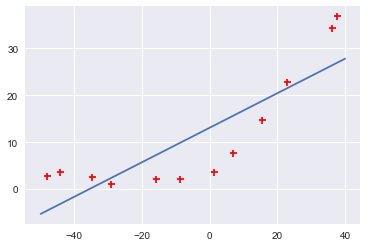

In [59]:
fit = trainLinearReg(X, y, 0).x
plt.scatter(X[:,1:],y, marker='+', c='r')
plt.plot([-50, 40], [fit[0]+fit[1]*(-50), fit[0]+fit[1]*(40)])